## Reading the Dataset

In [1]:
# Importing dependencies
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Setting up path to read/view pictures
dataset_dir = 'Dataset\cell_images'
parasitized_dir = os.path.join(dataset_dir, 'Parasitized')
uninfected_dir = os.path.join(dataset_dir, 'Uninfected')

In [3]:
# Create & Display images
def display_images(folder):
    plt.figure(figsize=(18,18))
    
    # Display the first 5 images
    for i, filename in enumerate(os.listdir(folder)[:5]):  
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

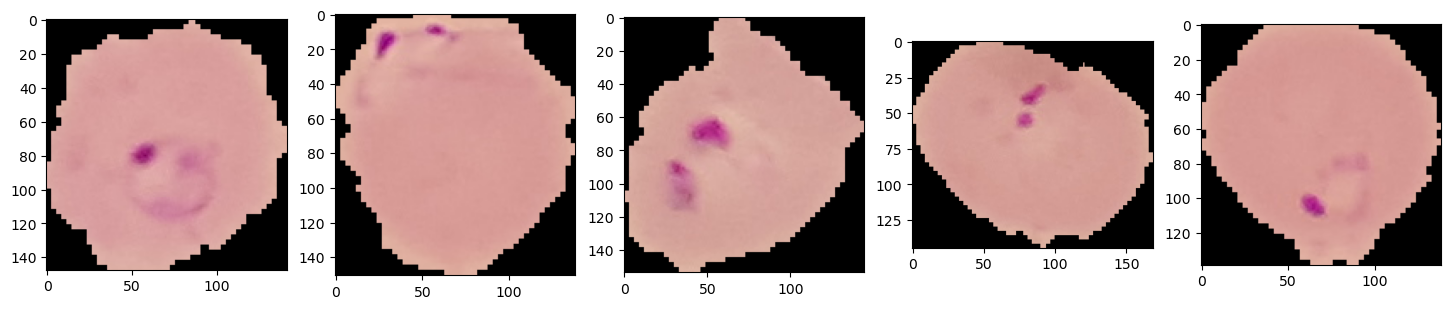

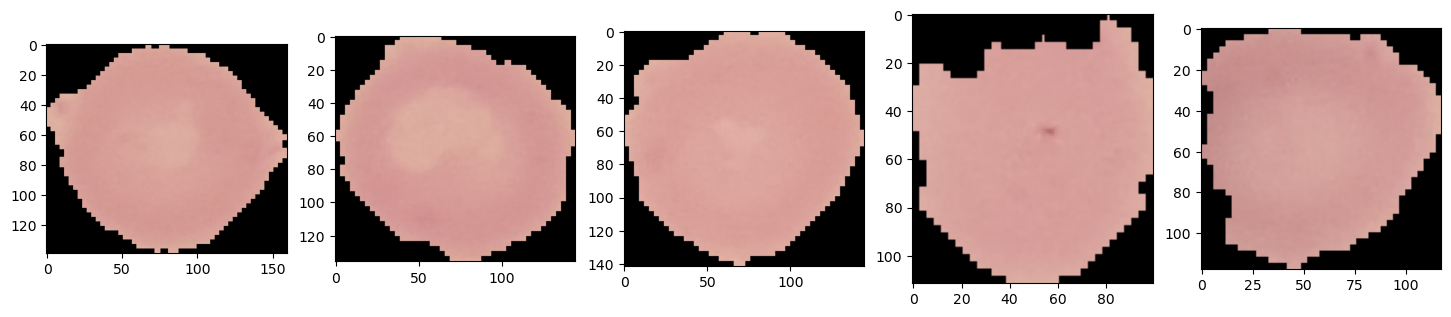

In [4]:
# Call the display_images function for both "parasitized" and "uninfected" folders to visualize the images
display_images(parasitized_dir)
display_images(uninfected_dir)

## Image Pre-Processing
## Splitting data into Training, Validation and Test

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Uninfected Images

In [6]:
from PIL import Image
import os

# Input and output folder paths
input_folder = "Dataset\\cell_images\\Uninfected"
output_folder = "Dataset\\clean"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Create subfolders for training and testing
train_folder = os.path.join(output_folder, "train", "uninfected_processed")
test_folder = os.path.join(output_folder, "test", "uninfected_processed")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the input folder
files = os.listdir(input_folder)

# Calculate the number of images for training and testing
num_train = 1750
num_test = 750

# Initialize counters for processed images in training and testing sets
processed_train_images = 0
processed_test_images = 0

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Determine whether to save in the training or testing folder
        if processed_train_images < num_train:
            output_path = os.path.join(train_folder, file)
            processed_train_images += 1
        elif processed_test_images < num_test:
            output_path = os.path.join(test_folder, file)
            processed_test_images += 1
        else:
            break

        # Save the resulting image in the appropriate folder with the same filename
        resized_image.save(output_path)

print("Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.")


Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.


### Infected Images

In [7]:
# Input and output folder paths
input_folder = "Dataset\\cell_images\\Parasitized"
output_folder = "Dataset\\clean"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Create subfolders for training and testing
train_folder = os.path.join(output_folder, "train", "infected_processed")
test_folder = os.path.join(output_folder, "test", "infected_processed")

os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# List all files in the input folder
files = os.listdir(input_folder)

# Calculate the number of images for training and testing
num_train = 1750
num_test = 750

# Initialize counters for processed images in training and testing sets
processed_train_images = 0
processed_test_images = 0

# Loop through each file in the input folder
for file in files:
    # Check if the file is an image 
    if file.endswith((".png")):
        # Open the image
        image_path = os.path.join(input_folder, file)
        image = Image.open(image_path)

        # Resize the image to 25x25 pixels
        new_size = (25, 25)
        resized_image = image.resize(new_size)

        # Determine whether to save in the training or testing folder
        if processed_train_images < num_train:
            output_path = os.path.join(train_folder, file)
            processed_train_images += 1
        elif processed_test_images < num_test:
            output_path = os.path.join(test_folder, file)
            processed_test_images += 1
        else:
            break

        # Save the resulting image in the appropriate folder with the same filename
        resized_image.save(output_path)

print("Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.")

Resizing and distribution complete with 1750 images in the training folder and 750 images in the test folder.


## Using Xception over a Pre-Trained  dataset: 'Imagenet'

In [8]:
import os
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense


In [9]:
# Setting path for training and testing images
train_dir = "Dataset/clean/train"
test_dir = "Dataset/clean/test"

In [10]:
# Create data generators with data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)


In [13]:
# Setting up data generators for training and testing images:
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(25,25),  
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(25,25),  
    batch_size=batch_size,
    class_mode='binary'
)

Found 3500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [14]:
# Checking the array for each batch
batch_iterator = test_generator.next()
batch_iterator

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [15]:
# Create the Xception base model with pre-trained weights
base_model = Xception(weights='imagenet', include_top=False)

In [21]:
# Add a custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [22]:
# Combine the base model and the custom head
model = Model(inputs=base_model.input, outputs=predictions)

In [23]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [24]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20, 
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20
110/110 [==============================] - 77s 649ms/step - loss: 0.6188 - accuracy: 0.6734 - val_loss: 0.5601 - val_accuracy: 0.7520
Epoch 2/20
110/110 [==============================] - 27s 242ms/step - loss: 0.5682 - accuracy: 0.7054 - val_loss: 0.5040 - val_accuracy: 0.7727
Epoch 3/20
110/110 [==============================] - 24s 221ms/step - loss: 0.5318 - accuracy: 0.7326 - val_loss: 0.5174 - val_accuracy: 0.7680
Epoch 4/20
110/110 [==============================] - 26s 235ms/step - loss: 0.5364 - accuracy: 0.7269 - val_loss: 0.5393 - val_accuracy: 0.7453
Epoch 5/20
110/110 [==============================] - 22s 201ms/step - loss: 0.5304 - accuracy: 0.7254 - val_loss: 0.5156 - val_accuracy: 0.7787
Epoch 6/20
110/110 [==============================] - 24s 216ms/step - loss: 0.5176 - accuracy: 0.7397 - val_loss: 0.5228 - val_accuracy: 0.7480
Epoch 7/20
110/110 [==============================] - 24s 222ms/step - loss: 0.5147 - accuracy: 0.7389 - val_loss: 0.5695 - val_ac

In [27]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

47/47 [==============================] - 6s 121ms/step - loss: 0.4496 - accuracy: 0.7900
Test accuracy: 79.00%


In [28]:
# Save the trained model to a file
model.save('xception_model.h5')

c:\Users\sharm\anaconda3\envs\dev\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualizing Loss vs Accuracy

In [29]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

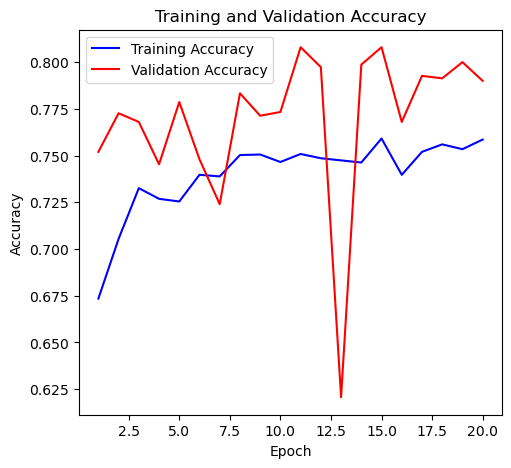

In [30]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

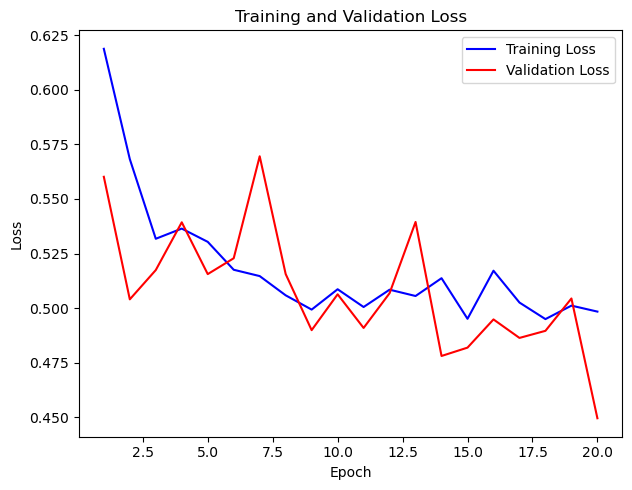

In [31]:
# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()